<a href="https://colab.research.google.com/github/tascamaria/PDEs-System-Identifiability/blob/main/Solve_Reaction_Diffusion_PDE_2_species_version_2_of_functions_f1%2C_f2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [2]:
# Coefficients

Dr = 400.0
Dg = 400.0
kr = 0.035
kg = 0.058

In [3]:
# Mesh
n = 501
x = np.linspace(0,1254,n)
dx = x[1]-x[0]


In [4]:
#Times for which to solve
t = np.linspace(0,48,4)

In [5]:

#Initial conditions
cr0 = 0.06 *((x<400) | (x>854))
cg0 = 0.06 *((x<300) | (x>854))
y0 = np.hstack((cr0,cg0))

In [6]:

# Set-up for ODE
def rhs(u,v,f, g, t):
    du = f(u,v)
    dv = g(u,v)
    for i in range(1,n-2):
        du[i] += Dr/ dx** 2 * (u[i-1]-2*u[i]+u[i+1])
        dv[i] += Dg/ dx** 2 * (v[i+1]-2*v[i]+ v[i-1])
    du[0] += 2 * Dr/ dx ** 2 * (u[1]-u[0])
    dv[0] += 2 * Dg/ dx ** 2 * (v[1]-v[0])
    du[n-1] += 2* Dr/ dx ** 2 * (u[n-2]-u[n-1])
    dv[n-1] += 2* Dg/ dx ** 2 * (v[n-2]-v[n-1])
    return (du,dv)


In [7]:
# Having fun with f1, f2


def f1(vr,vg):
  return -kr*vr+2* kg * vg * (1 - (vg+vr))
def f2(vr,vg):
  return -kg*vg*(1-(vg+vr))+kr*vr


In [8]:
def ode(y,t):
    u = y[0:n]
    v = y[n:]
    (du,dv) = rhs(u,v,f1,f2,t)
    dy = np.hstack((du,dv))
    return dy

In [9]:
y = y0
u = y[0:n]
v = y[n:]
f2(u,v)
type(y)

numpy.ndarray

In [10]:
#Solve
y = odeint(ode, y0, t)
Y = np.vstack(y)
U = Y[:,0:n]
V = Y[:, n:]

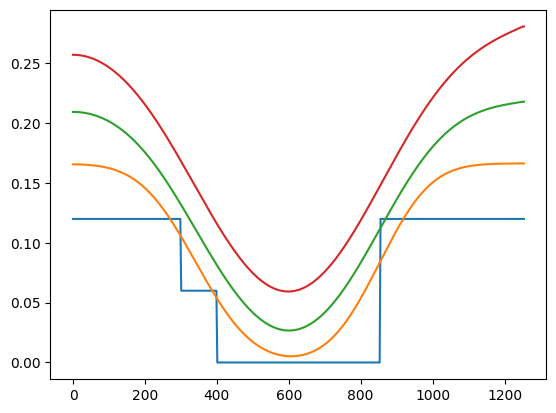

In [13]:
# Plot
fig = plt.plot(x,np.transpose(U+V))
plt.show()